## Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('players_20.csv')

In [3]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [5]:
for col in df.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [6]:
df.shape

(18278, 104)

## Visualizations

In [7]:
player_salary = df[['short_name','wage_eur']]

In [8]:
player_salary.head(10)

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000
5,K. De Bruyne,370000
6,M. ter Stegen,250000
7,V. van Dijk,200000
8,L. Modrić,340000
9,M. Salah,240000


In [9]:
player_salary = player_salary.sort_values(by=['wage_eur'],ascending = False)

In [10]:
player_salary.head()

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


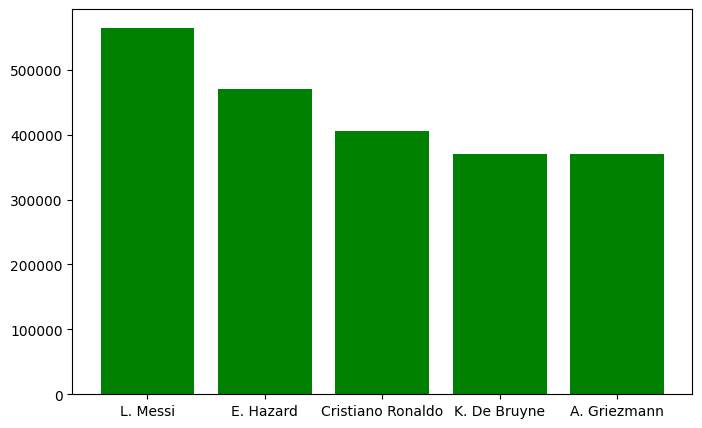

In [11]:
plt.figure(figsize=(8,5))
plt.bar(list(player_salary['short_name'])[0:5],list(player_salary['wage_eur'])[0:5],color = 'g')
plt.show()

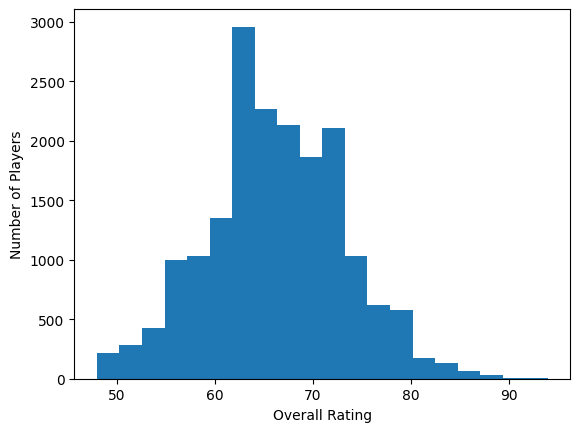

In [12]:
plt.hist(df['overall'], bins=20)
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.show()

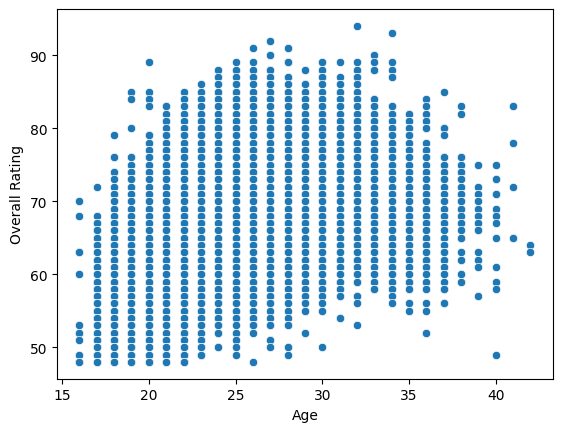

In [13]:
sb.scatterplot(x='age', y='overall', data=df)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

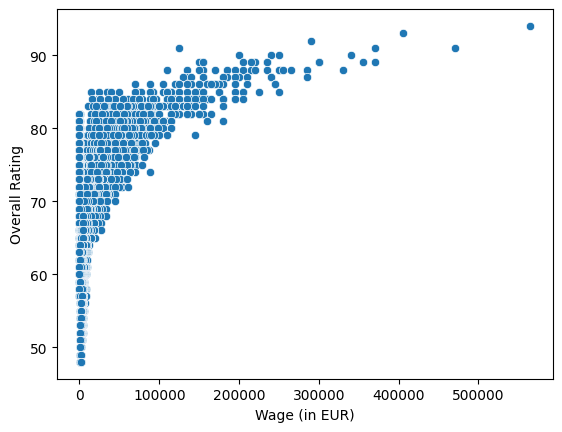

In [14]:
sb.scatterplot(x='wage_eur', y='overall', data=df)
plt.xlabel('Wage (in EUR)')
plt.ylabel('Overall Rating')
plt.show()

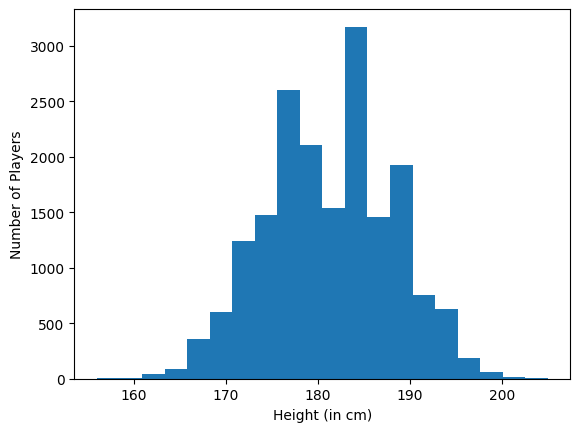

In [15]:
plt.hist(df['height_cm'], bins=20)
plt.xlabel('Height (in cm)')
plt.ylabel('Number of Players')
plt.show()

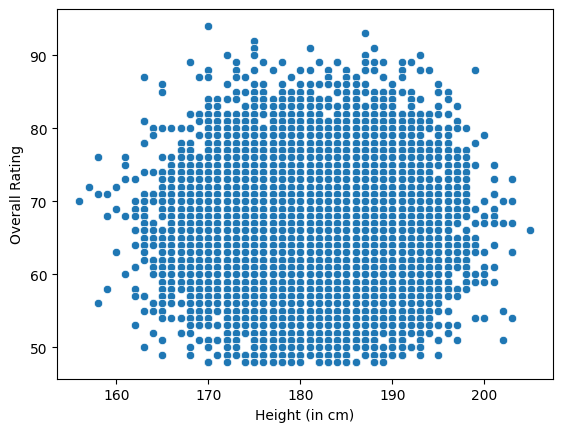

In [16]:
sb.scatterplot(x='height_cm', y='overall', data=df)
plt.xlabel('Height (in cm)')
plt.ylabel('Overall Rating')
plt.show()

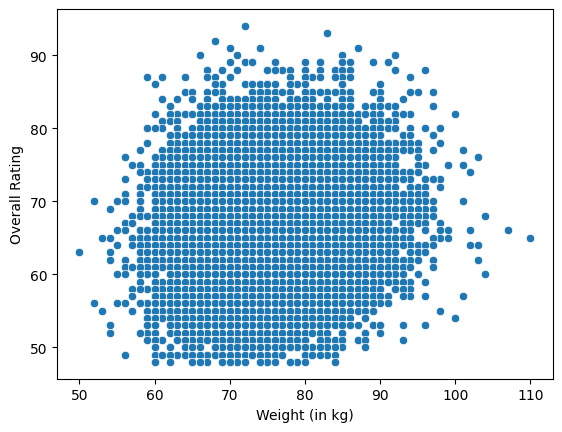

In [17]:
sb.scatterplot(x='weight_kg', y='overall', data=df)
plt.xlabel('Weight (in kg)')
plt.ylabel('Overall Rating')
plt.show()

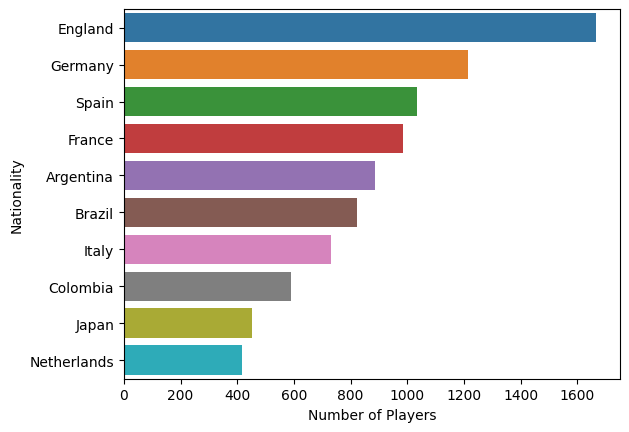

In [18]:
sb.countplot(y='nationality', data=df, order=df['nationality'].value_counts().iloc[:10].index)
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.show()

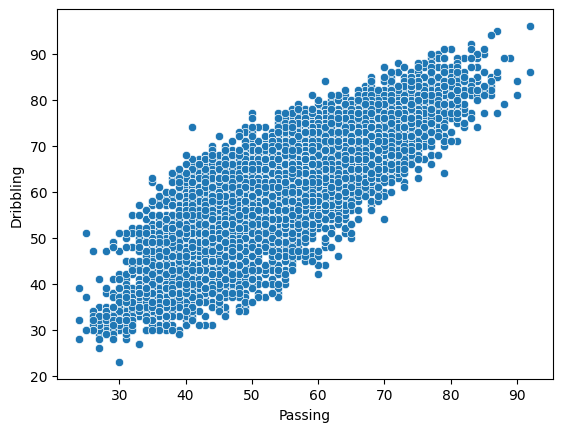

In [19]:
sb.scatterplot(x='passing', y='dribbling', data=df)
plt.xlabel('Passing')
plt.ylabel('Dribbling')
plt.show()

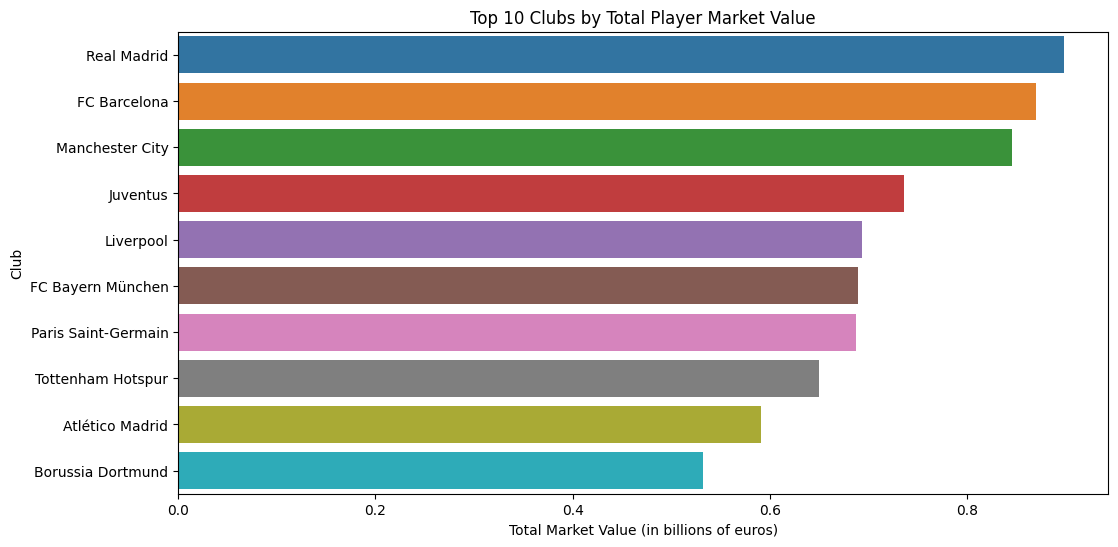

In [20]:
club_value = df.groupby('club')['value_eur'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Clubs by Total Player Market Value')
sb.barplot(x=club_value.values/1e9, y=club_value.index)
plt.xlabel('Total Market Value (in billions of euros)')
plt.ylabel('Club')

plt.show()

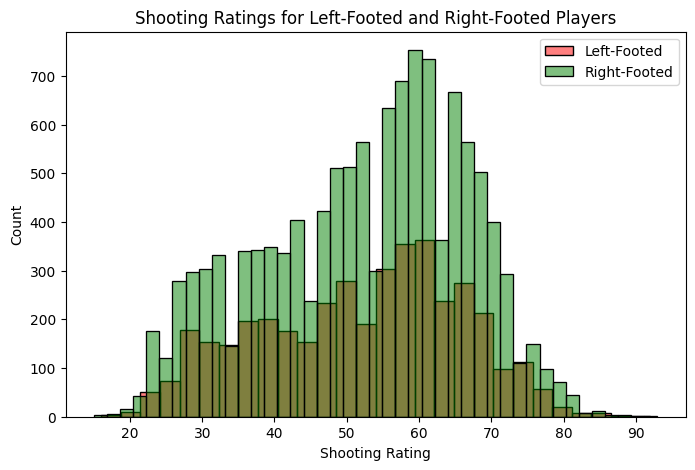

In [21]:
left_footed_shooting = df[df['preferred_foot'] == 'Left']['shooting']
right_footed_shooting = df[df['preferred_foot'] == 'Right']['shooting']

plt.figure(figsize=(8, 5))
plt.title('Shooting Ratings for Left-Footed and Right-Footed Players')
sb.histplot(left_footed_shooting, color='r', alpha=0.5, label='Left-Footed')
sb.histplot(right_footed_shooting, color='g', alpha=0.5, label='Right-Footed')
plt.xlabel('Shooting Rating')
plt.ylabel('Count')
plt.legend()
plt.show()


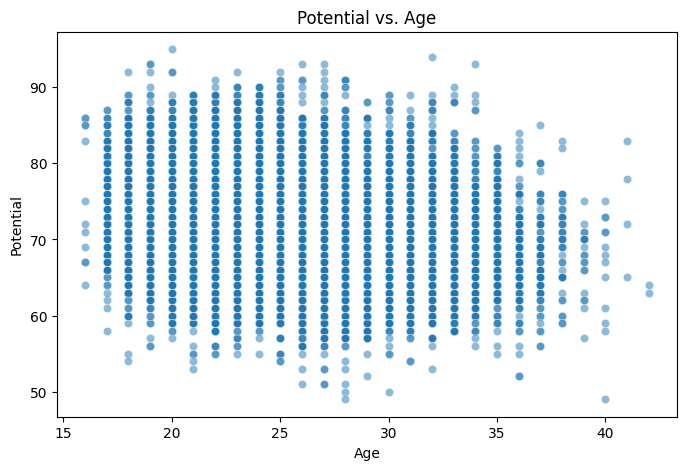

In [22]:
plt.figure(figsize=(8, 5))
plt.title('Potential vs. Age')
sb.scatterplot(x='age', y='potential', data=df, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()


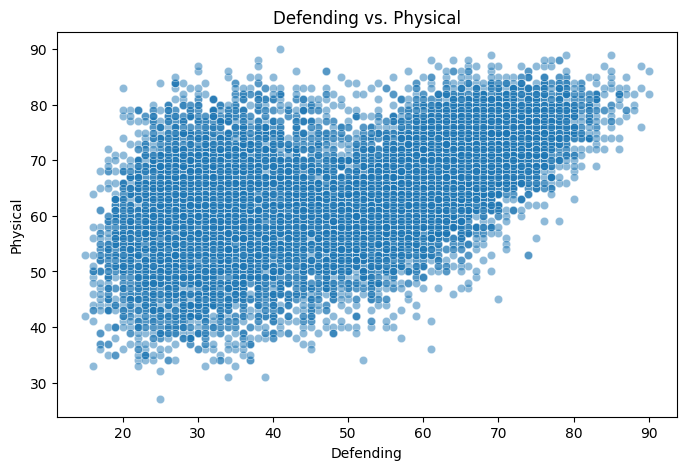

In [23]:
plt.figure(figsize=(8, 5))
plt.title('Defending vs. Physical')
sb.scatterplot(x='defending', y='physic', data=df, alpha=0.5)
plt.xlabel('Defending')
plt.ylabel('Physical')
plt.show()


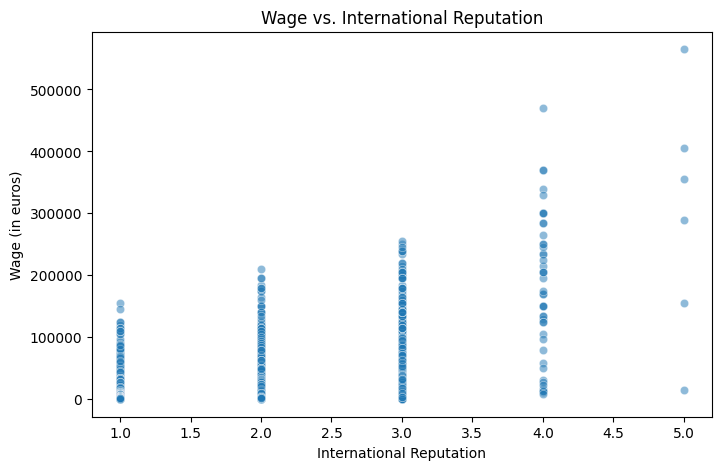

In [24]:
plt.figure(figsize=(8, 5))
plt.title('Wage vs. International Reputation')
sb.scatterplot(x='international_reputation', y='wage_eur', data=df, alpha=0.5)
plt.xlabel('International Reputation')
plt.ylabel('Wage (in euros)')
plt.show()


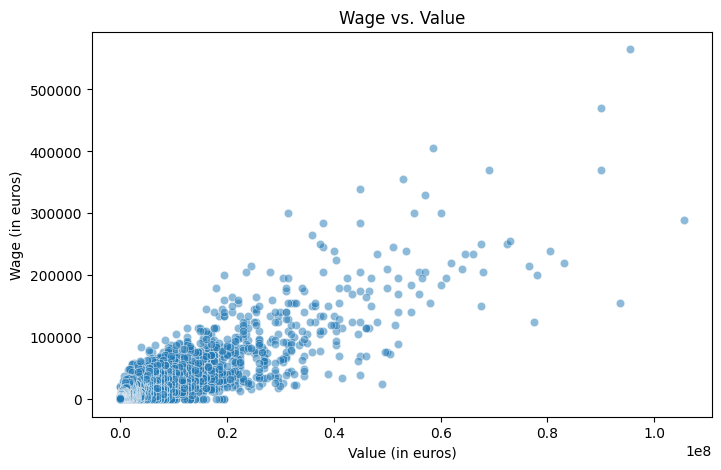

In [25]:
plt.figure(figsize=(8, 5))
plt.title('Wage vs. Value')
sb.scatterplot(x='value_eur', y='wage_eur', data=df, alpha=0.5)
plt.xlabel('Value (in euros)')
plt.ylabel('Wage (in euros)')
plt.show()


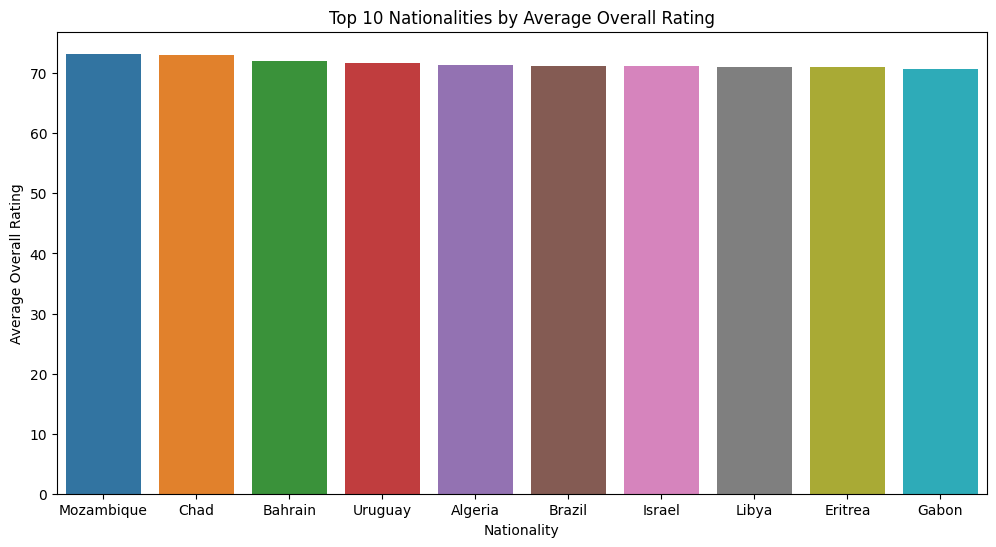

In [26]:
nationality_overall = df.groupby('nationality')['overall'].mean().sort_values(ascending=False).iloc[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Nationalities by Average Overall Rating')
sb.barplot(x=nationality_overall.index, y=nationality_overall.values)
plt.xlabel('Nationality')
plt.ylabel('Average Overall Rating')
plt.show()


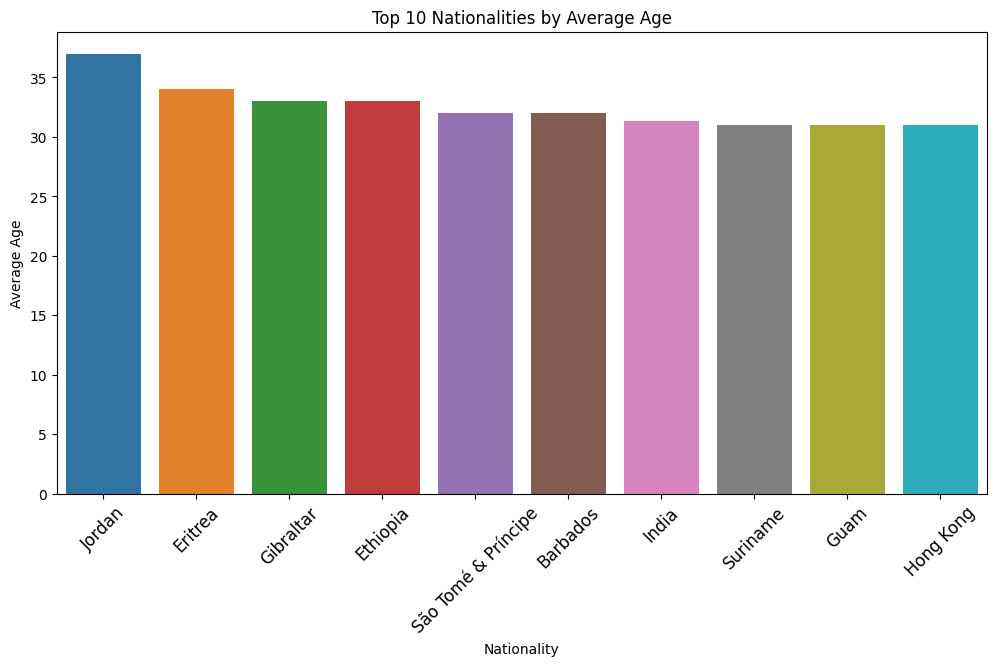

In [27]:
nationality_age = df.groupby('nationality')['age'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Nationalities by Average Age')
sb.barplot(x=nationality_age.index, y=nationality_age.values)
plt.xlabel('Nationality')
plt.ylabel('Average Age')
plt.xticks(rotation=45, fontsize=12)
plt.show()


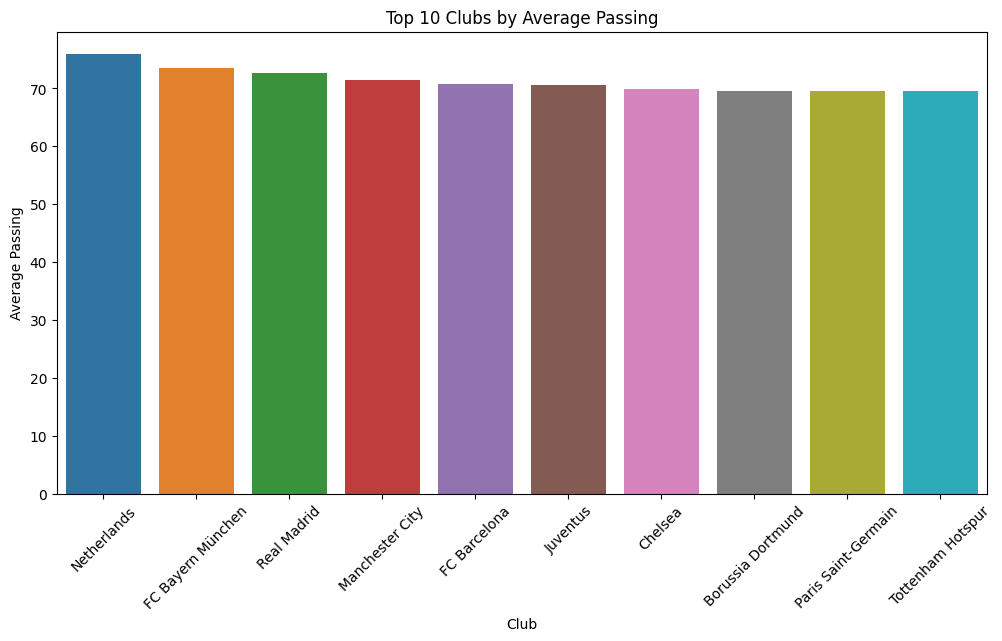

In [28]:
passing_top10 = df.groupby('club')['passing'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Clubs by Average Passing')
sb.barplot(x=passing_top10.index, y=passing_top10.values)
plt.xlabel('Club')
plt.ylabel('Average Passing')
plt.xticks(rotation=45, fontsize=10)
plt.show()

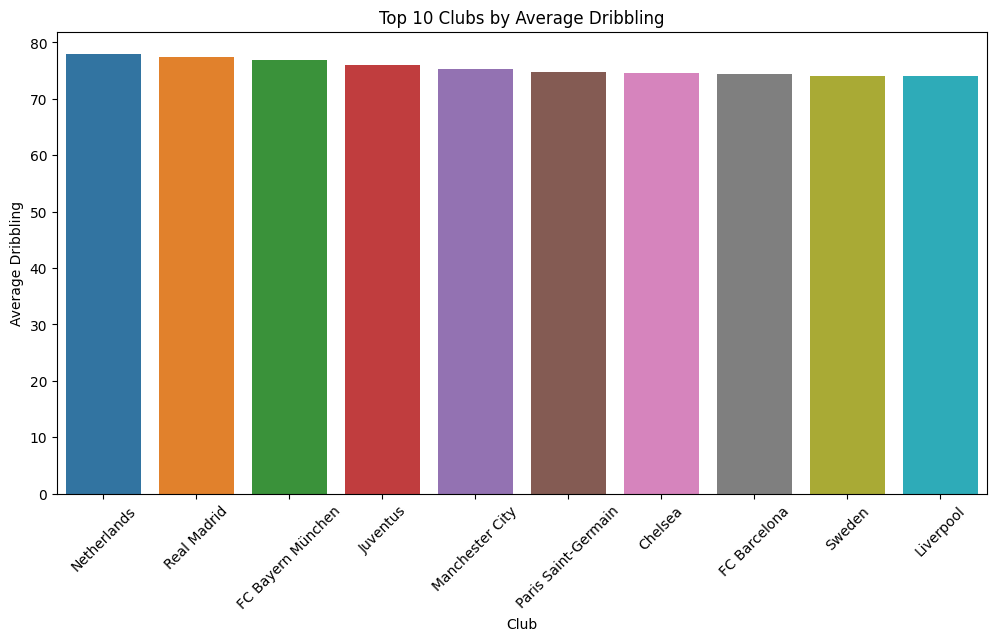

In [29]:
dribbling_top10 = df.groupby('club')['dribbling'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Clubs by Average Dribbling')
sb.barplot(x=dribbling_top10.index, y=dribbling_top10.values)
plt.xlabel('Club')
plt.ylabel('Average Dribbling')
plt.xticks(rotation=45, fontsize=10)
plt.show()


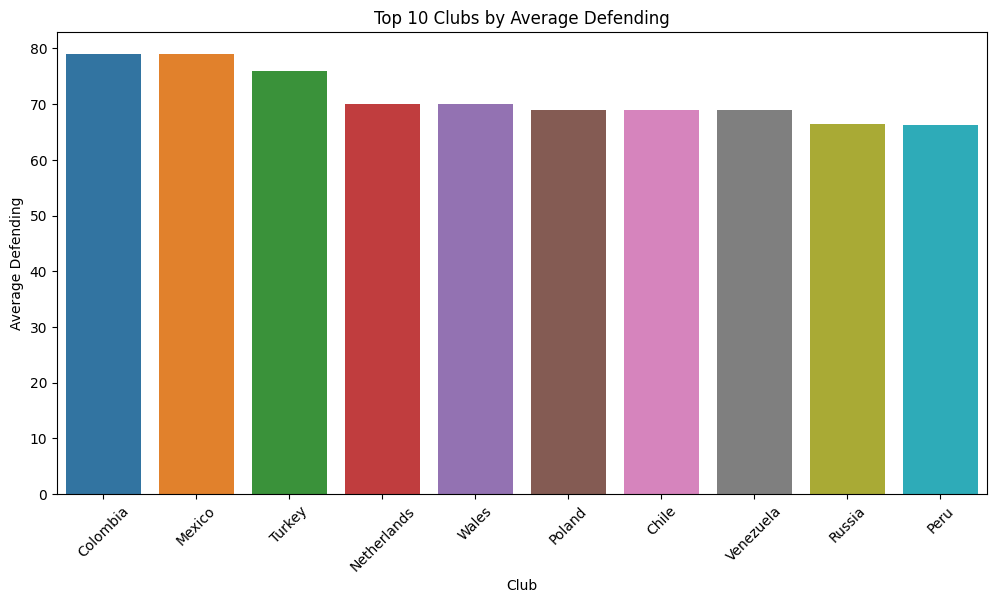

In [30]:
defending_top10 = df.groupby('club')['defending'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Clubs by Average Defending')
sb.barplot(x=defending_top10.index, y=defending_top10.values)
plt.xlabel('Club')
plt.ylabel('Average Defending')
plt.xticks(rotation=45, fontsize=10)
plt.show()


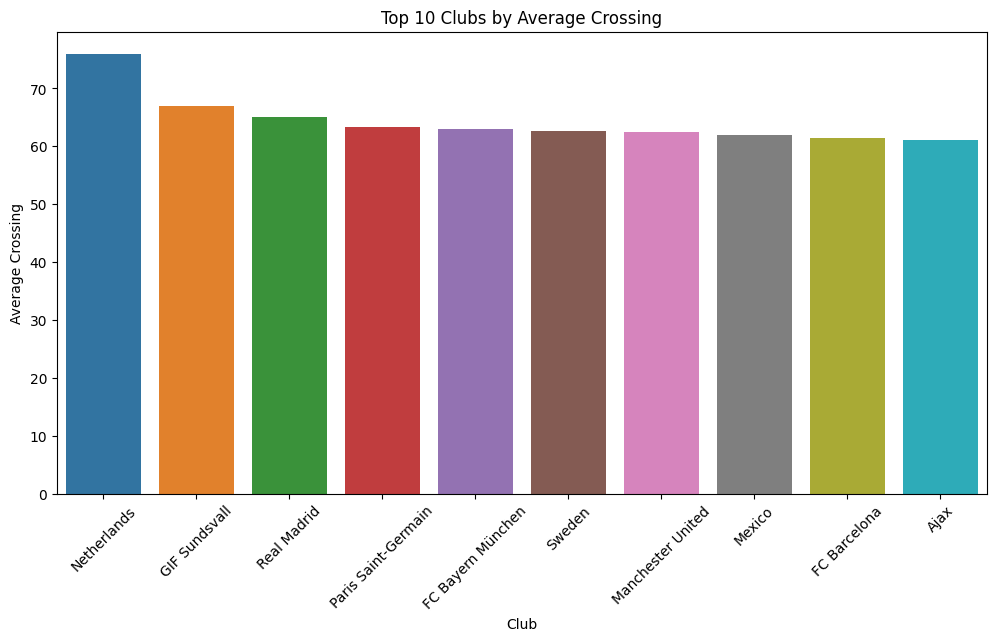

In [31]:
crossing_top10 = df.groupby('club')['attacking_crossing'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Clubs by Average Crossing')
sb.barplot(x=crossing_top10.index, y=crossing_top10.values)
plt.xlabel('Club')
plt.ylabel('Average Crossing')
plt.xticks(rotation=45, fontsize=10)
plt.show()


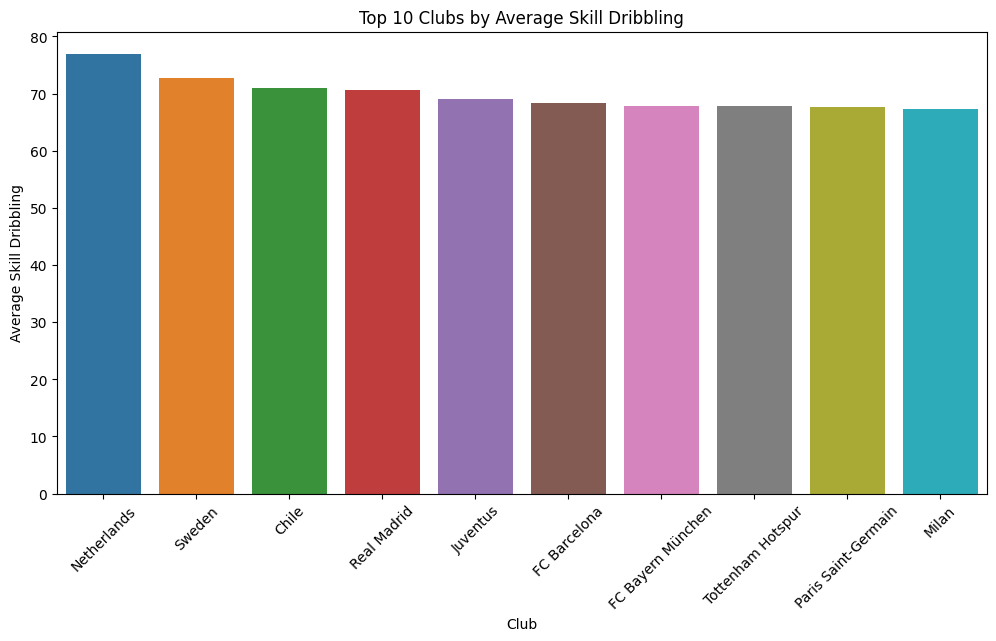

In [32]:
skill_dribbling_top10 = df.groupby('club')['skill_dribbling'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Clubs by Average Skill Dribbling')
sb.barplot(x=skill_dribbling_top10.index, y=skill_dribbling_top10.values)
plt.xlabel('Club')
plt.ylabel('Average Skill Dribbling')
plt.xticks(rotation=45, fontsize=10)
plt.show()


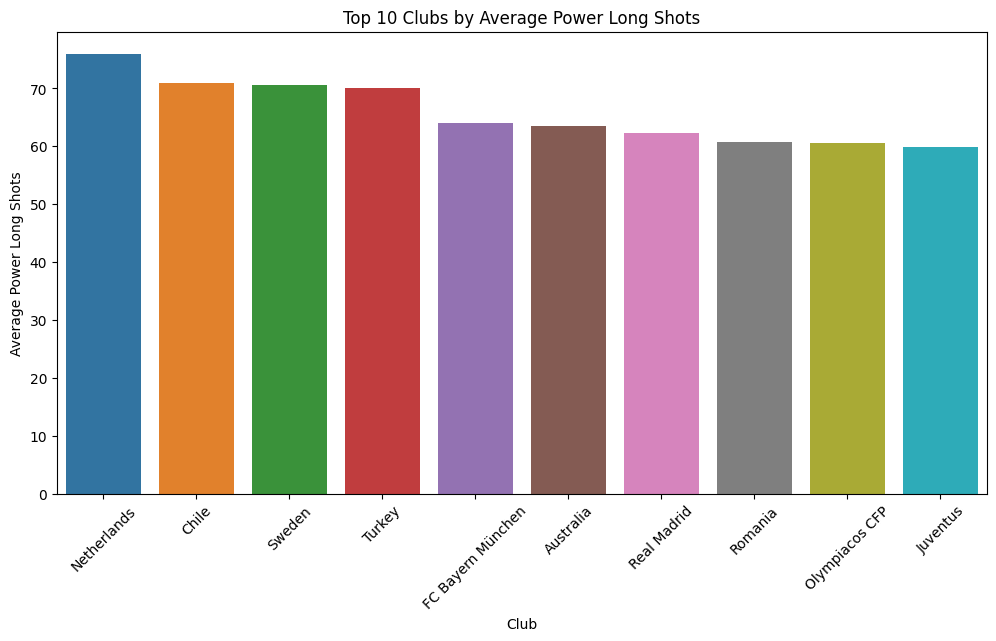

In [33]:
long_shots_top10 = df.groupby('club')['power_long_shots'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Clubs by Average Power Long Shots')
sb.barplot(x=long_shots_top10.index, y=long_shots_top10.values)
plt.xlabel('Club')
plt.ylabel('Average Power Long Shots')
plt.xticks(rotation=45, fontsize=10)
plt.show()


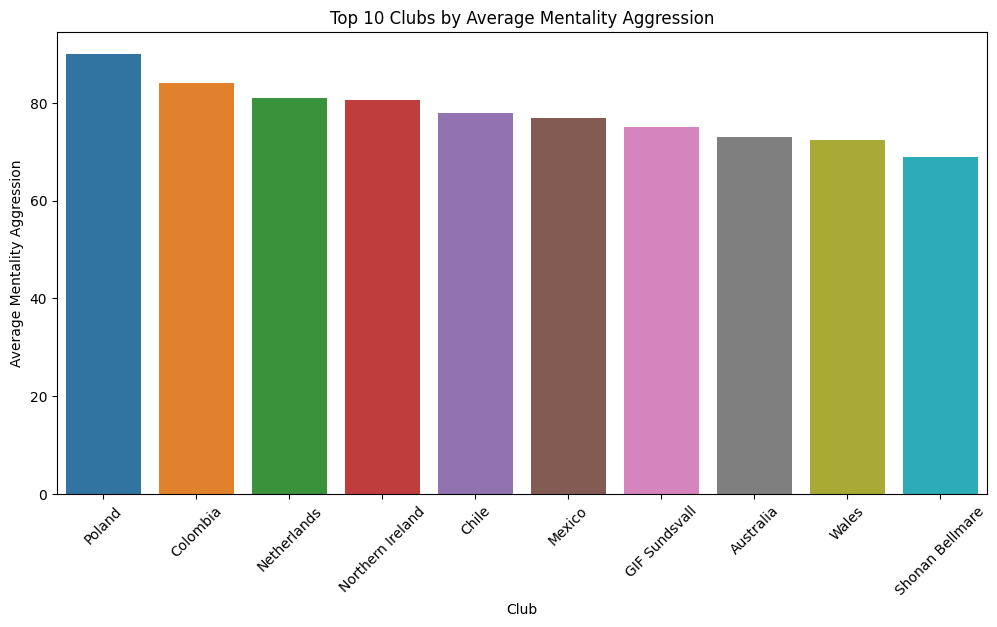

In [34]:
aggression_top10 = df.groupby('club')['mentality_aggression'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
plt.title('Top 10 Clubs by Average Mentality Aggression')
sb.barplot(x=aggression_top10.index, y=aggression_top10.values)
plt.xlabel('Club')
plt.ylabel('Average Mentality Aggression')
plt.xticks(rotation=45, fontsize=10)
plt.show()


In [35]:
Portugal = df[df['nationality'] == 'Portugal']
Portugal.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
41,218667,https://sofifa.com/player/218667/bernardo-mota...,Bernardo Silva,Bernardo Mota Veiga de Carvalho e Silva,24,1994-08-10,173,64,Portugal,Manchester City,...,72+2,69+2,69+2,69+2,72+2,67+2,57+2,57+2,57+2,67+2
85,212198,https://sofifa.com/player/212198/bruno-miguel-...,Bruno Fernandes,Bruno Miguel Borges Fernandes,24,1994-09-08,179,69,Portugal,Sporting CP,...,77+2,77+2,77+2,77+2,77+2,74+2,68+2,68+2,68+2,74+2
86,199482,https://sofifa.com/player/199482/anthony-lopes...,A. Lopes,Anthony Lopes,28,1990-10-01,184,81,Portugal,Olympique Lyonnais,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,210514,https://sofifa.com/player/210514/joao-pedro-ca...,João Cancelo,João Pedro Cavaco Cancelo,25,1994-05-27,182,74,Portugal,Manchester City,...,83+2,79+2,79+2,79+2,83+2,82+2,76+2,76+2,76+2,82+2


In [36]:
Portugal.shape

(344, 104)

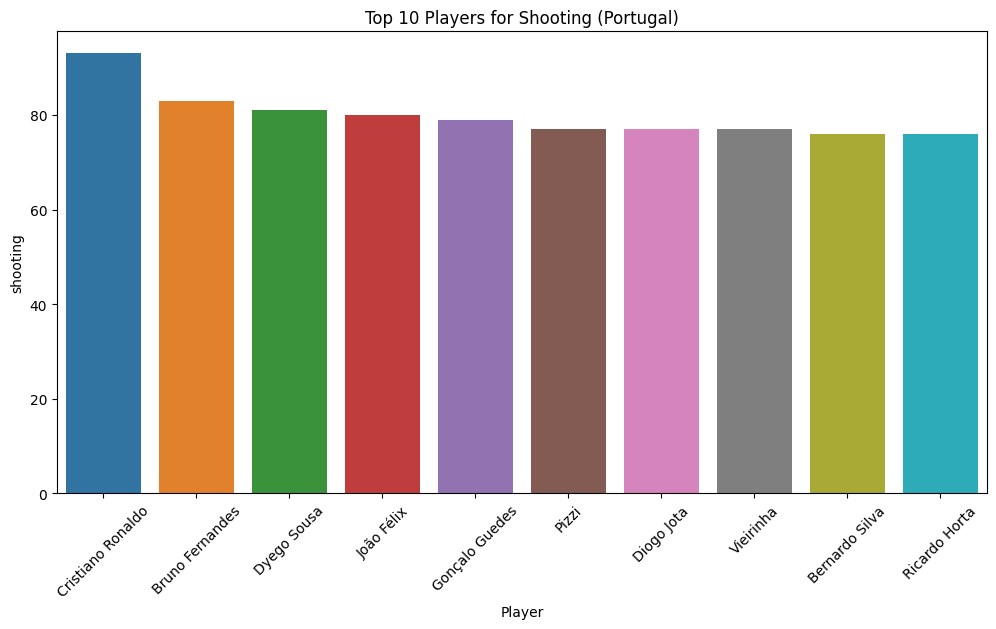

In [37]:
top_shooting = Portugal[['short_name', 'shooting']].sort_values(by='shooting', ascending=False)[:10]
plt.figure(figsize=(12,6))
plt.title('Top 10 Players for Shooting (Portugal)')
sb.barplot(x=top_shooting['short_name'], y=top_shooting['shooting'])
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Player')
plt.show()

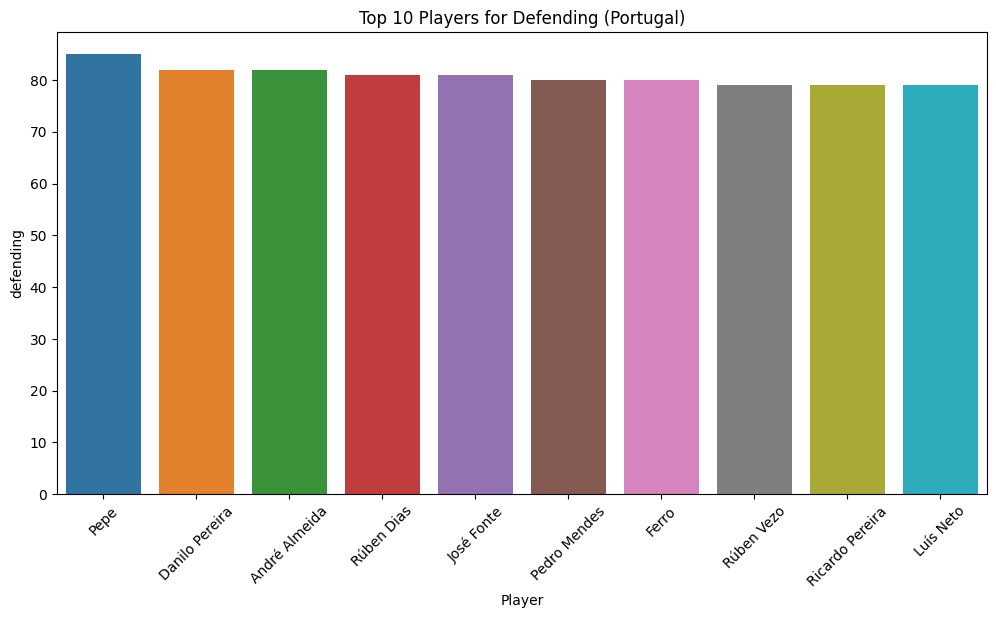

In [38]:
top_defending = Portugal[['short_name', 'defending']].sort_values(by='defending', ascending=False)[:10]
plt.figure(figsize=(12,6))
plt.title('Top 10 Players for Defending (Portugal)')
sb.barplot(x=top_defending['short_name'], y=top_defending['defending'])
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Player')
plt.show()

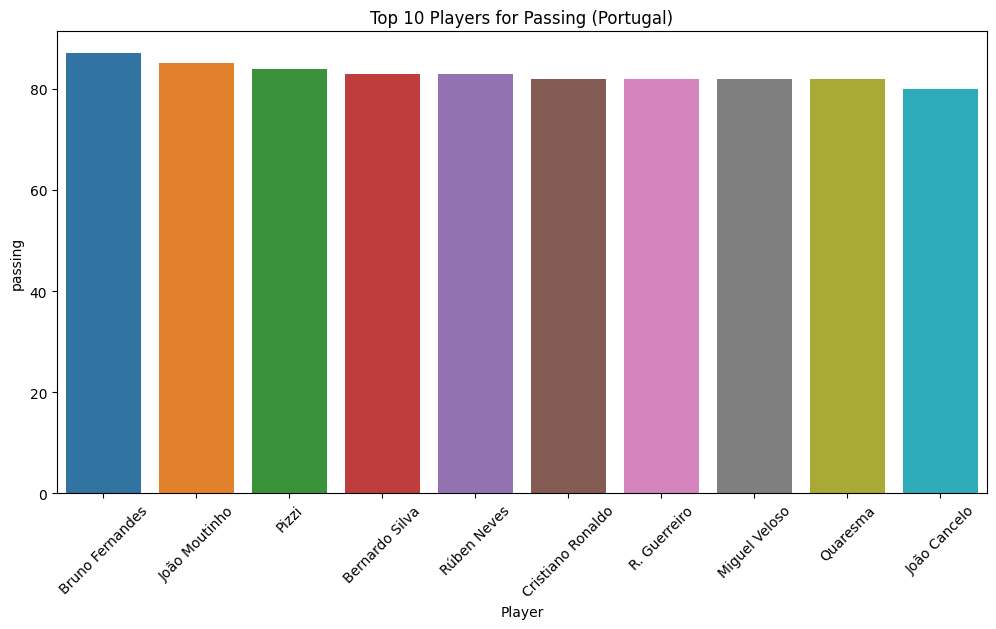

In [39]:
top_passing = Portugal[['short_name', 'passing']].sort_values(by='passing', ascending=False)[:10]
plt.figure(figsize=(12,6))
plt.title('Top 10 Players for Passing (Portugal)')
sb.barplot(x=top_passing['short_name'], y=top_passing['passing'])
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Player')
plt.show()


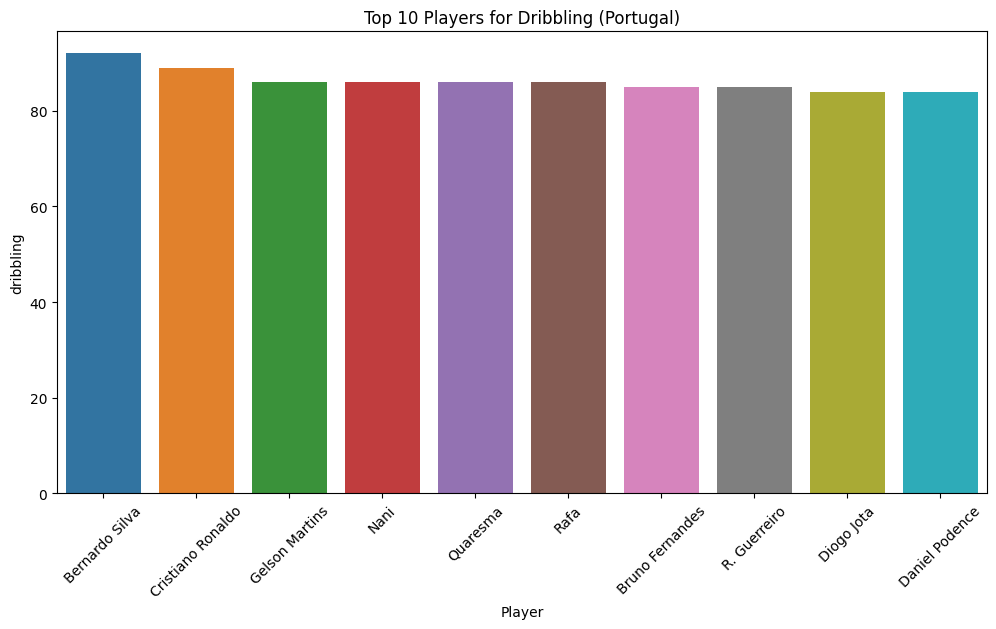

In [40]:
top_dribbling = Portugal[['short_name', 'dribbling']].sort_values(by='dribbling', ascending=False)[:10]
plt.figure(figsize=(12,6))
plt.title('Top 10 Players for Dribbling (Portugal)')
sb.barplot(x=top_dribbling['short_name'], y=top_dribbling['dribbling'])
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Player')
plt.show()
